# 🧠 Handwritten Digit Recognition using Deep Learning

_A deep learning project comparing dense and convolutional networks for handwritten digit recognition using TensorFlow and the MNIST dataset._
- _DNN_ _&_ _CNN_
---

## 📂 Dataset and Tools

- **Dataset**: MNIST (70,000 images of handwritten digits, 28×28 grayscale)
- **Models Used**:
  - Dense Neural Network
  - Convolutional Neural Network (CNN)
- **Framework**: TensorFlow/Keras
- **Tools**: Jupyter Notebook, NumPy, Matplotlib, Seaborn

---

## 🧰 Skills Demonstrated
- Building deep learning models with TensorFlow/Keras
- Image preprocessing and reshaping for CNNs
- Performance comparison using accuracy and confusion matrix
- Visualizing misclassifications and prediction confidence

---

## 🚀 Model Architectures

### 🔷 1. Fully Connected Neural Network

| Layer   | Type    | Units | Activation |
|---------|---------|-------|------------|
| Input   | Flatten | -     | -          |
| Hidden  | Dense   | 128   | ReLU       |
| Output  | Dense   | 10    | Softmax    |

- **Optimizer**: Adam  
- **Loss**: Categorical Crossentropy  
- **Epochs**: 3 
- **batch_size**=70,
- **validation_split**=0.25
- **Accuracy Achieved**: ~96.94%

---

### 🔶 2. Convolutional Neural Network (CNN)

| Layer       | Type        | Filters | Kernel Size | Activation |
|-------------|-------------|---------|-------------|------------|
| Conv2D      | Convolution | 32      | 3×3         | ReLU       |
| MaxPooling2D| Pooling     | 2×2     |             |            |
| Flatten     |             |         |             |            |
| Dense       | Hidden      | 64      |             | ReLU       |
| Dense       | Output      | 10      |             | Softmax    |

- **Optimizer**: Adam  
- **Loss**: Categorical Crossentropy  
- **Epochs**: 5  
- **batch_size**=64,
- **validation_split**=0.27
- **Accuracy Achieved**: ~98.22%

---

## 📊 Performance Comparison

| Model | Test Accuracy |
|-------|---------------|
| Dense | 96.94%         |
| CNN   | 98.22%         |

---

## 📌 Why These Parameters?

- **ReLU**: Non-linear activation; avoids vanishing gradients.
- **Softmax**: Ideal for multi-class classification.
- **Adam**: Adaptive optimizer that combines RMSProp and momentum.
- **3×3 kernels**: Standard for capturing spatial features.
- **128 / 64 units**: Balance between performance and overfitting.

---

## 🔍 Results Visualization

- Misclassified digit samples shown using matplotlib
- Used confusion matrix (with `seaborn`) for deeper evaluation

---

## 📁 Project Structure

```
mnist-digit-recognition-cnn-tensorflow/
├── digital-recognition.ipynb      # Jupyter notebook with both models
├── requirements.txt     
└── README.md                     # This file
```
---

## 🚀 Future Improvements
- Add dropout and batch normalization to improve generalization
- Experiment with different optimizers and learning rates
- Deploy the model using Streamlit or Flask as a web app
- Try transfer learning with pretrained models

 ---

## 📚 Inspiration

This project was inspired by the *Advanced Learning Algorithms* course from the [Machine Learning Specialization](https://www.coursera.org/specializations/machine-learning-introduction) by DeepLearning.AI on Coursera.



In [ ]:
"""
MNIST Handwritten Digit Classification
 This notebook implements and compares two deep learning models using the MNIST handwritten digit dataset:
A Fully Connected Neural Network (Dense)
A Convolutional Neural Network (CNN)
We:

Preprocess data (normalization, reshaping)
Train & evaluate both models
Compare their performance
Visualize misclassifications & metrics
"""

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1️⃣ Load & Prepare the MNIST Data
 - Normalize pixel values (0–255 → 0–1)
 - Reshape data for CNN input
 - Convert labels to one-hot encoded vectors

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN needs a 4D input: (samples, height, width, channels)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 2️⃣ Dense Neural Network Model
Architecture:

- Flatten: convert 2D image to 1D vector
- Dense(128): hidden layer with 128 neurons (ReLU)
- Dense(10): output layer for 10 digit classes (Softmax)

In [ ]:
from tensorflow.keras.layers import Dropout
dense_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train_cat,
                                epochs=3, batch_size=70,
                                validation_split=0.25)

Epoch 1/3
643/643 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8369 - loss: 0.5889 - val_accuracy: 0.9426 - val_loss: 0.2020
Epoch 2/3
643/643 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9525 - loss: 0.1684 - val_accuracy: 0.9591 - val_loss: 0.1421
Epoch 3/3
643/643 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9697 - loss: 0.1082 - val_accuracy: 0.9647 - val_loss: 0.1238


# Dense Model: Accuracy per Epoch

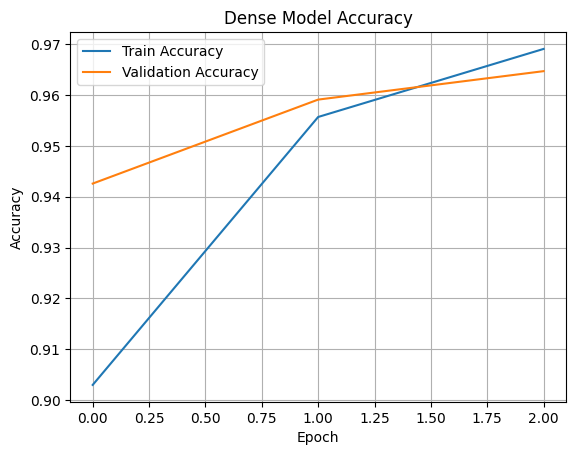

In [ ]:
plt.plot(dense_history.history['accuracy'], label='Train Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dense Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 3️⃣ Convolutional Neural Network (CNN)
Architecture:

- Conv2D(32): extract 32 feature maps using 3x3 filters
- MaxPooling2D: downsample using 2x2 pool
- Dense(64): fully connected layer
- Dense(10): output softmax layer
- CNNs are better at capturing spatial patterns than dense networks.

In [61]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train_cat,
                            epochs=5, batch_size=64,
                            validation_split=0.27)

Epoch 1/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8584 - loss: 0.4874 - val_accuracy: 0.9687 - val_loss: 0.1039
Epoch 2/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9762 - loss: 0.0811 - val_accuracy: 0.9773 - val_loss: 0.0734
Epoch 3/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9853 - loss: 0.0527 - val_accuracy: 0.9800 - val_loss: 0.0682
Epoch 4/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9795 - val_loss: 0.0656
Epoch 5/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9802 - val_loss: 0.0689


# CNN Model: Accuracy per Epoch

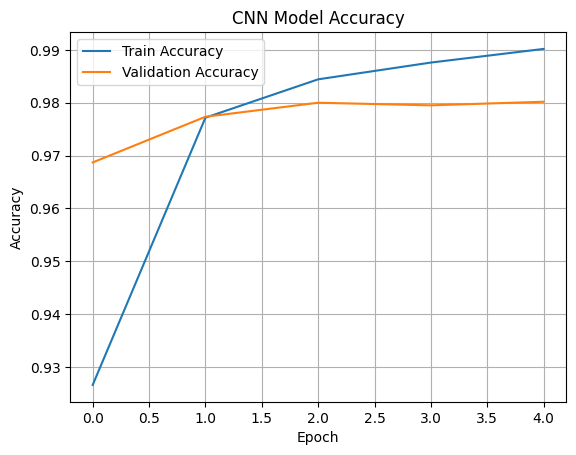

In [62]:
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 4️⃣ Model Evaluation on Test Data
Compare the accuracy of both models on the unseen test dataset.

In [63]:
dense_test_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)[1]
cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)[1]

print(f"Dense Model Accuracy: {dense_test_acc:.4f}")
print(f"CNN Model Accuracy:   {cnn_test_acc:.4f}")

Dense Model Accuracy: 0.9694
CNN Model Accuracy:   0.9822


#5️⃣ Classification Report & Confusion Matrix (CNN)
Get detailed metrics:

- Precision, Recall, F1-score
- Confusion matrix showing actual vs. predicted digits

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



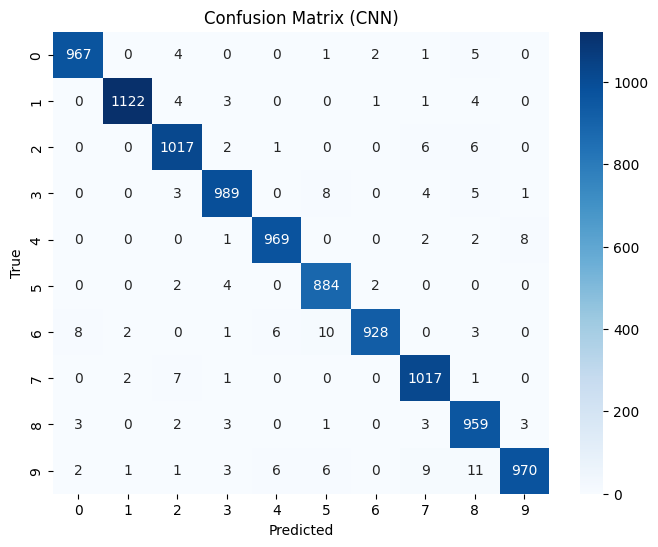

In [64]:
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)

print("Classification Report (CNN):")
print(classification_report(y_test, y_pred_cnn))

conf_matrix = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6️⃣ Visualize Misclassified Digits
- Show some digits the CNN predicted incorrectly. This helps understand edge cases.

Sample Misclassified Digits:


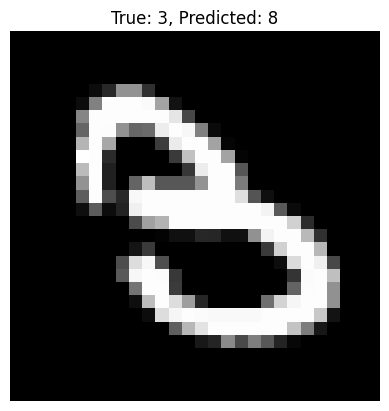

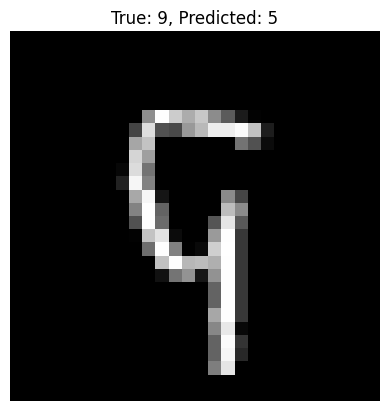

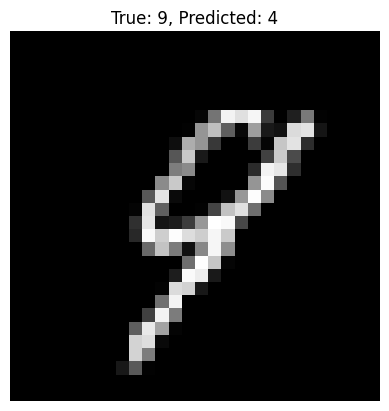

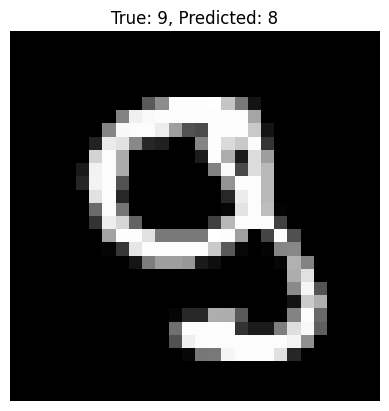

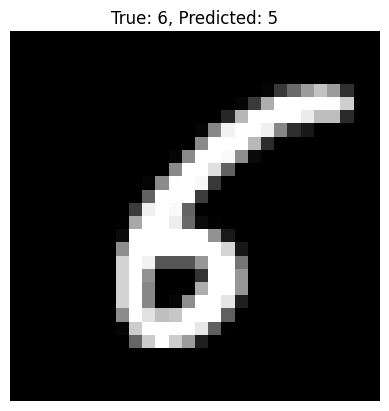

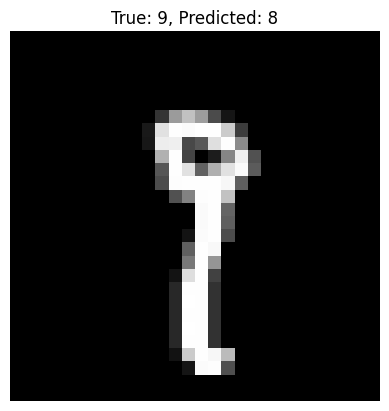

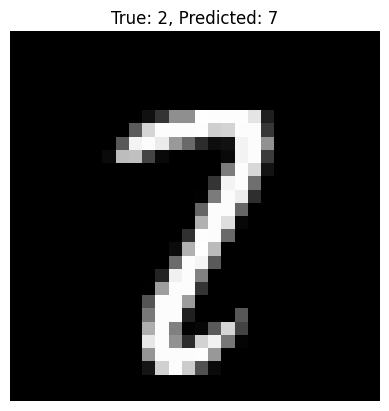

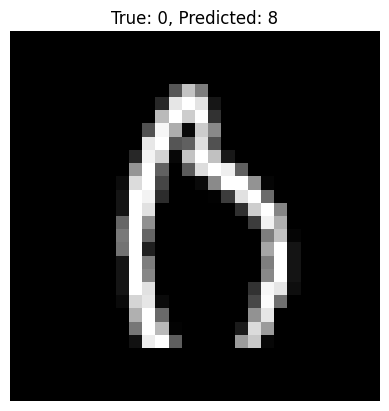

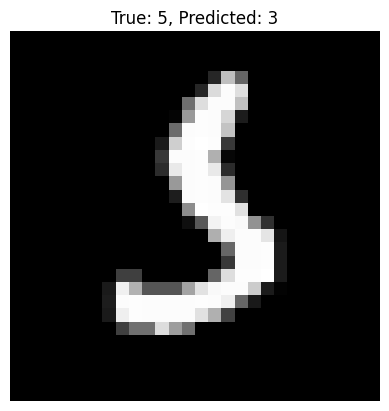

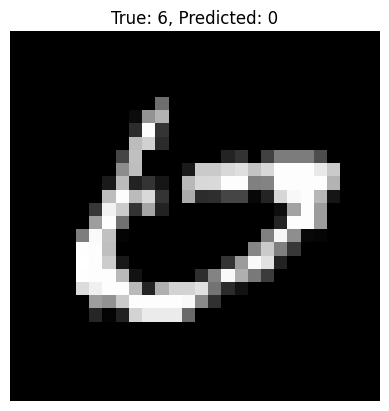

In [66]:
wrong = np.where(y_pred_cnn != y_test)[0]

print("Sample Misclassified Digits:")
for i in range(10):
    idx = wrong[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred_cnn[idx]}")
    plt.axis('off')
    plt.show()

- Correctly Classified Samples
- To better understand what the model learns, here's a look at a few correct predictions. This complements the misclassified ones by showing digits the model recognizes confidently.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


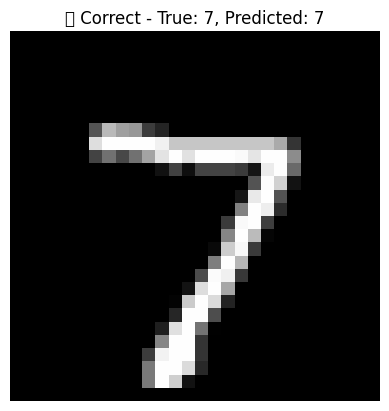

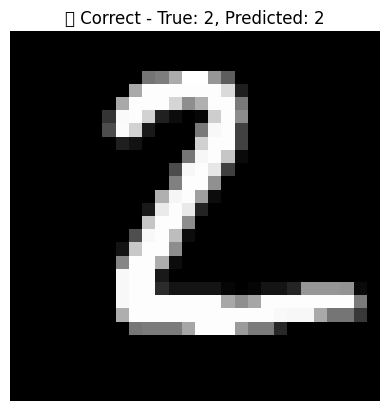

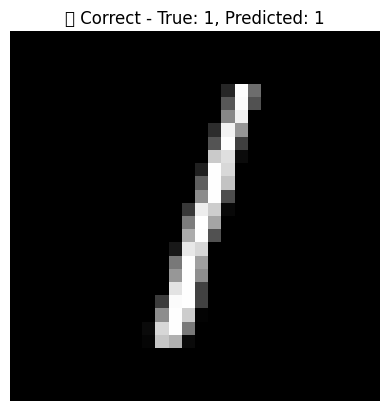

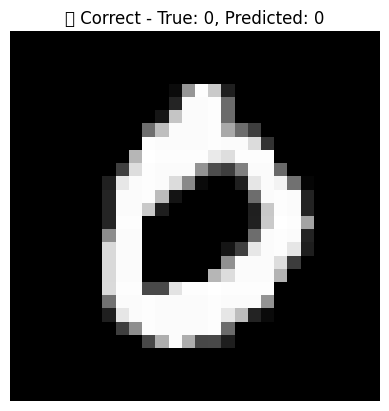

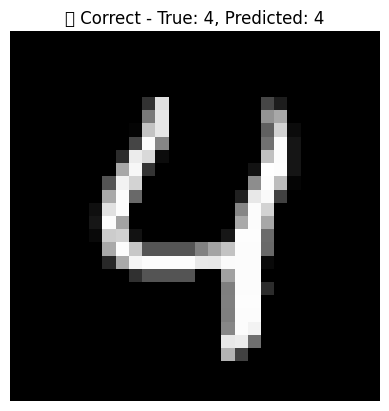

In [68]:
# Generate predictions from the CNN model
preds = cnn_model.predict(x_test_cnn)

# Indices of correct predictions
correct = np.where(np.argmax(preds, axis=1) == y_test)[0]

# Show 5 correctly predicted samples
for i in range(5):
    idx = correct[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"✅ Correct - True: {y_test[idx]}, Predicted: {np.argmax(preds[idx])}")
    plt.axis('off')
    plt.show()